In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot
plt.rcParams['svg.fonttype'] = 'none'
%matplotlib inline

from datetime import datetime
def timestamp(): return datetime.today().strftime('%Y%m%d')

from sklearn.preprocessing import QuantileTransformer
def quantile_scale(df,feats):
    qua = df
    scaler = QuantileTransformer(
        n_quantiles=10,
        random_state=42,
        ignore_implicit_zeros=True, #sparse matrix
    )
    # fit the scaler
    scaler.fit(qua[feats])
    # transform values
    qua[feats] = scaler.transform(qua[feats])
    return qua
def tiered(classes):
    trans = []
    for x in classes:
        if x==1: c=0
        if x==2: c=1
        if x>=3 and x<=4: c=2
        if x>=5 and x<=7: c=3
        if x>=8: c=4
        trans.append(c)
    return trans

In [64]:
df = pd.read_csv("../RESULTS/gbbo.features.20190909.tsv",sep="\t")
feats = ['tech_mean','tech','mean_star','star','mean_good','good','mean_bad','bad']
df = quantile_scale(df,feats)
df['place']=tiered(df['place'])
df = df.loc[df['season']!=1]
df
df.head()

/Users/tacitus/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2088: UserWarning: 'ignore_implicit_zeros' takes effect only with sparse matrix. This parameter has no effect.
  warnings.warn("'ignore_implicit_zeros' takes effect only with"


,season,baker,episode,place,tech_mean,tech,mean_star,star,mean_good,good,mean_bad,bad
60,2,Ben,1,3,0.111111,5.555556e-01,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07
61,2,Ben,2,3,0.083333,4.444444e-01,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07
62,2,Ben,3,3,0.111111,6.111111e-01,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07
63,2,Ben,4,3,0.217645,7.777778e-01,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07
64,2,Ben,5,3,0.139520,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07


In [61]:
cols = list(reversed(['#00247d', '#787095', '#c6c6a9', '#d57e67', '#cf142b']))
colr = {}
for i,e in enumerate(cols): colr[i]=e
df['colr'] = df['place'].map(colr)

/Users/tacitus/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Users/tacitus/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Users/tacitus/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/Users/tacitus/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/tacitus/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Us

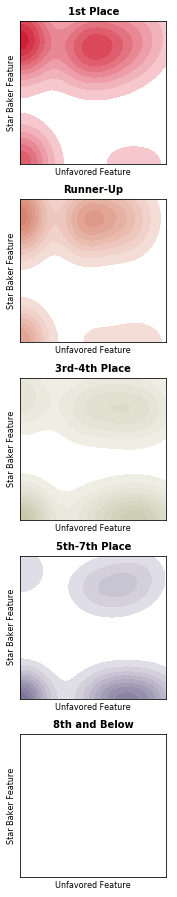

In [69]:
ncol=1
nrow=len(set(df['place']))
sz=2.5

f, ax = plt.subplots(nrow,ncol,figsize=(ncol*sz,nrow*sz))
labs = ['1st Place','Runner-Up','3rd-4th Place','5th-7th Place','8th and Below']
for i,e in enumerate(set(df['place'])):
    tmp = df.loc[df['place']==e]
    col = cols[i]

    sns.kdeplot(
        tmp['mean_bad'],
        tmp['mean_star'],
        color=col,
        shade=True,
        gridsize=50,
        shade_lowest=False,
        ax=ax[i]
    )
    ax[i].set_title(labs[i],fontsize=10,weight='bold')
    ax[i].set_xlim(0,1)
    ax[i].set_ylim(0,1)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_ylabel('Star Baker Feature')
    ax[i].set_xlabel('Unfavored Feature')

    
f.tight_layout()
f.savefig("../FIGURES/gbbo.2dkde.png",dpi=150)

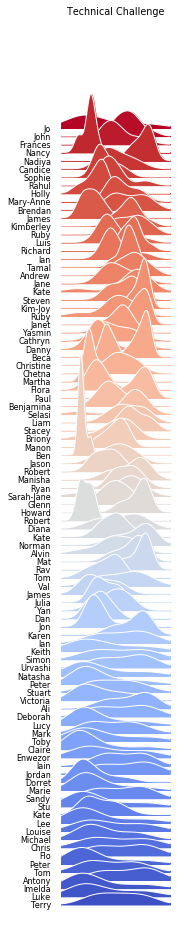

In [36]:
import joypy
import matplotlib
nrow=1
ncol=len(set(df['place']))
sz=3.5
pal = matplotlib.colors.ListedColormap(cols)
labs = ['1st Place','Runner-Up','3rd-4th Place','5th-7th Place','8th and Below']
places = [0,1,2]

tmp = df.sort_values(by=['place','season'])
ind = []
ylabs=[]
i=0
n=None
for name in tmp['baker']:
    if n==None: 
        ylabs.append(name)
        n=name
    if n!=name: 
        i+=1
        n=name
        ylabs.append(name)
    ind.append(i)
tmp['ind']=ind

vapeplot.font_size(8)
f, ax = joypy.joyplot(
        tmp,
        by="ind",
        column="tech_mean",
        linewidth=1, 
        legend=False, 
        figsize=(2.5,13),
        colormap=matplotlib.cm.coolwarm_r,
        linecolor="w",
        labels=ylabs,
        xlabels=False,
        overlap=3,
        bins=100,
        grid=False,
        title='Technical Challenge'
        #grid=False,fill=False,background='k',linecolor='w'    
)
#f.tight_layout()
f.savefig("../FIGURES/gbbo.tech.joyplot.png",dpi=300)

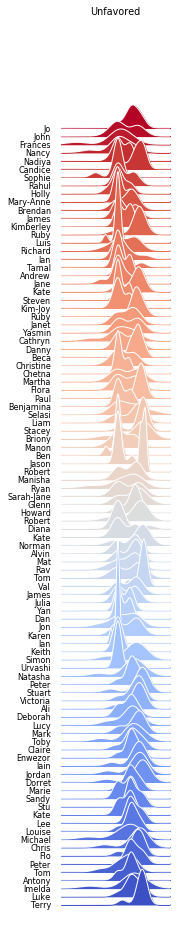

In [73]:

tmp = df.sort_values(by=['place','season'])
ind = []
ylabs=[]
i=0
n=None
for name in tmp['baker']:
    if n==None: 
        ylabs.append(name)
        n=name
    if n!=name: 
        i+=1
        n=name
        ylabs.append(name)
    ind.append(i)
tmp['ind']=ind

tran = []
c={}
for ind,ele in tmp.iterrows():
    if c.get(ele['baker'])==None: c[ele['baker']]=[ele['mean_bad']]
    else: c[ele['baker']].append(ele['mean_bad'])
        
for ind,ele in tmp.iterrows():
    #if len(set(c[ele['baker']]))==1: 
    if ele['episode']==6:
        tran.append(np.random.normal(0,0.5,1)[0])
    else : tran.append(ele['mean_bad'])
tmp['mean_bad']=tran

vapeplot.font_size(8)
f, ax = joypy.joyplot(
        tmp,
        by="ind",
        column="mean_bad",
        linewidth=1, 
        legend=False, 
        figsize=(2.5,13),
        colormap=matplotlib.cm.coolwarm_r,
        linecolor="w",
        labels=ylabs,
        xlabels=False,
        overlap=3,
        bins=100,
        grid=False,
        title='Unfavored'
        #grid=False,fill=False,background='k',linecolor='w'    
)
f.savefig("../FIGURES/gbbo.bad.joyplot.png",dpi=300)

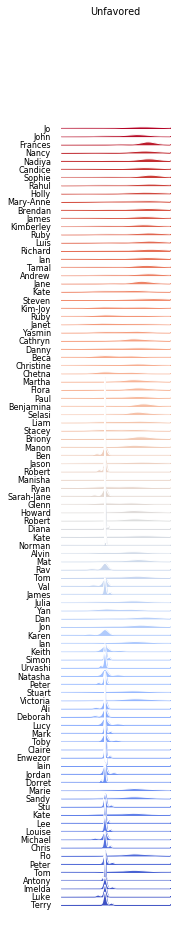

In [79]:

tmp = df.sort_values(by=['place','season'])
ind = []
ylabs=[]
i=0
n=None
for name in tmp['baker']:
    if n==None: 
        ylabs.append(name)
        n=name
    if n!=name: 
        i+=1
        n=name
        ylabs.append(name)
    ind.append(i)
tmp['ind']=ind

tran = []
c={}
for ind,ele in tmp.iterrows():
    if c.get(ele['baker'])==None: c[ele['baker']]=[ele['mean_bad']]
    else: c[ele['baker']].append(ele['mean_star'])
        
for ind,ele in tmp.iterrows():
    #if len(set(c[ele['baker']]))==1: 
    if ele['episode']==6:
        tran.append(np.random.normal(0,0.2,1)[0])
    else : tran.append(ele['mean_good'])
tmp['mean_good']=tran

vapeplot.font_size(8)
f, ax = joypy.joyplot(
        tmp,
        by="ind",
        column="mean_good",
        linewidth=1, 
        legend=False, 
        figsize=(2.5,13),
        colormap=matplotlib.cm.coolwarm_r,
        linecolor="w",
        labels=ylabs,
        xlabels=False,
        overlap=3,
        bins=500,
        grid=False,
        title='Unfavored'
        #grid=False,fill=False,background='k',linecolor='w'    
)
f.savefig("../FIGURES/gbbo.good.joyplot.png",dpi=300)

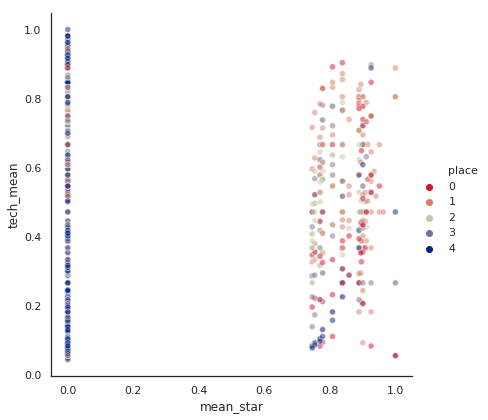

In [95]:
sns.set(style="white")
sns.relplot(
            x="mean_star", 
            y="tech_mean", 
            hue="place",
            palette=cols,
            alpha=.5,
            height=6, data=df)

In [4]:
!pip install joypy

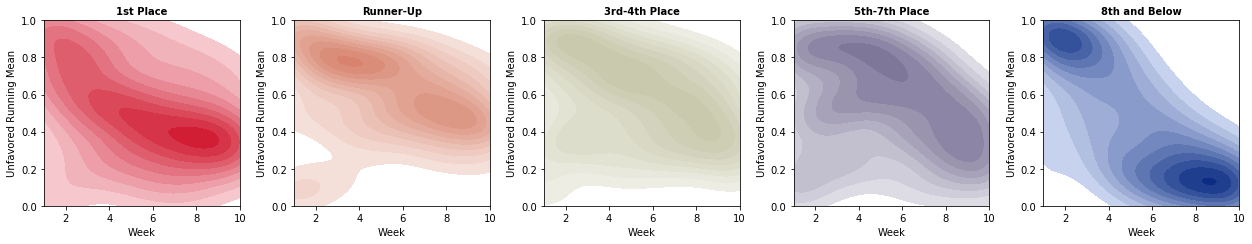

In [59]:
nrow=1
ncol=len(set(df['place']))
sz=3.5

f, ax = plt.subplots(nrow,ncol,figsize=(ncol*sz,nrow*sz))
labs = ['1st Place','Runner-Up','3rd-4th Place','5th-7th Place','8th and Below']
for i,e in enumerate(set(df['place'])):
    tmp = df.loc[df['place']==e]
    col = cols[i]

    sns.kdeplot(
        tmp['episode'],
        tmp['tech_mean'],
        color=col,
        shade=True,
        gridsize=100,
        shade_lowest=False,
        ax=ax[i]
    )
    ax[i].set_title(labs[i],fontsize=10,weight='bold')
    ax[i].set_xlim(1,10)
    ax[i].set_ylim(0,1)
    ax[i].set_ylabel('Unfavored Running Mean')
    ax[i].set_xlabel('Week')

    
f.tight_layout()
f.savefig("../FIGURES/gbbo.2dkde.epi.png",dpi=150)

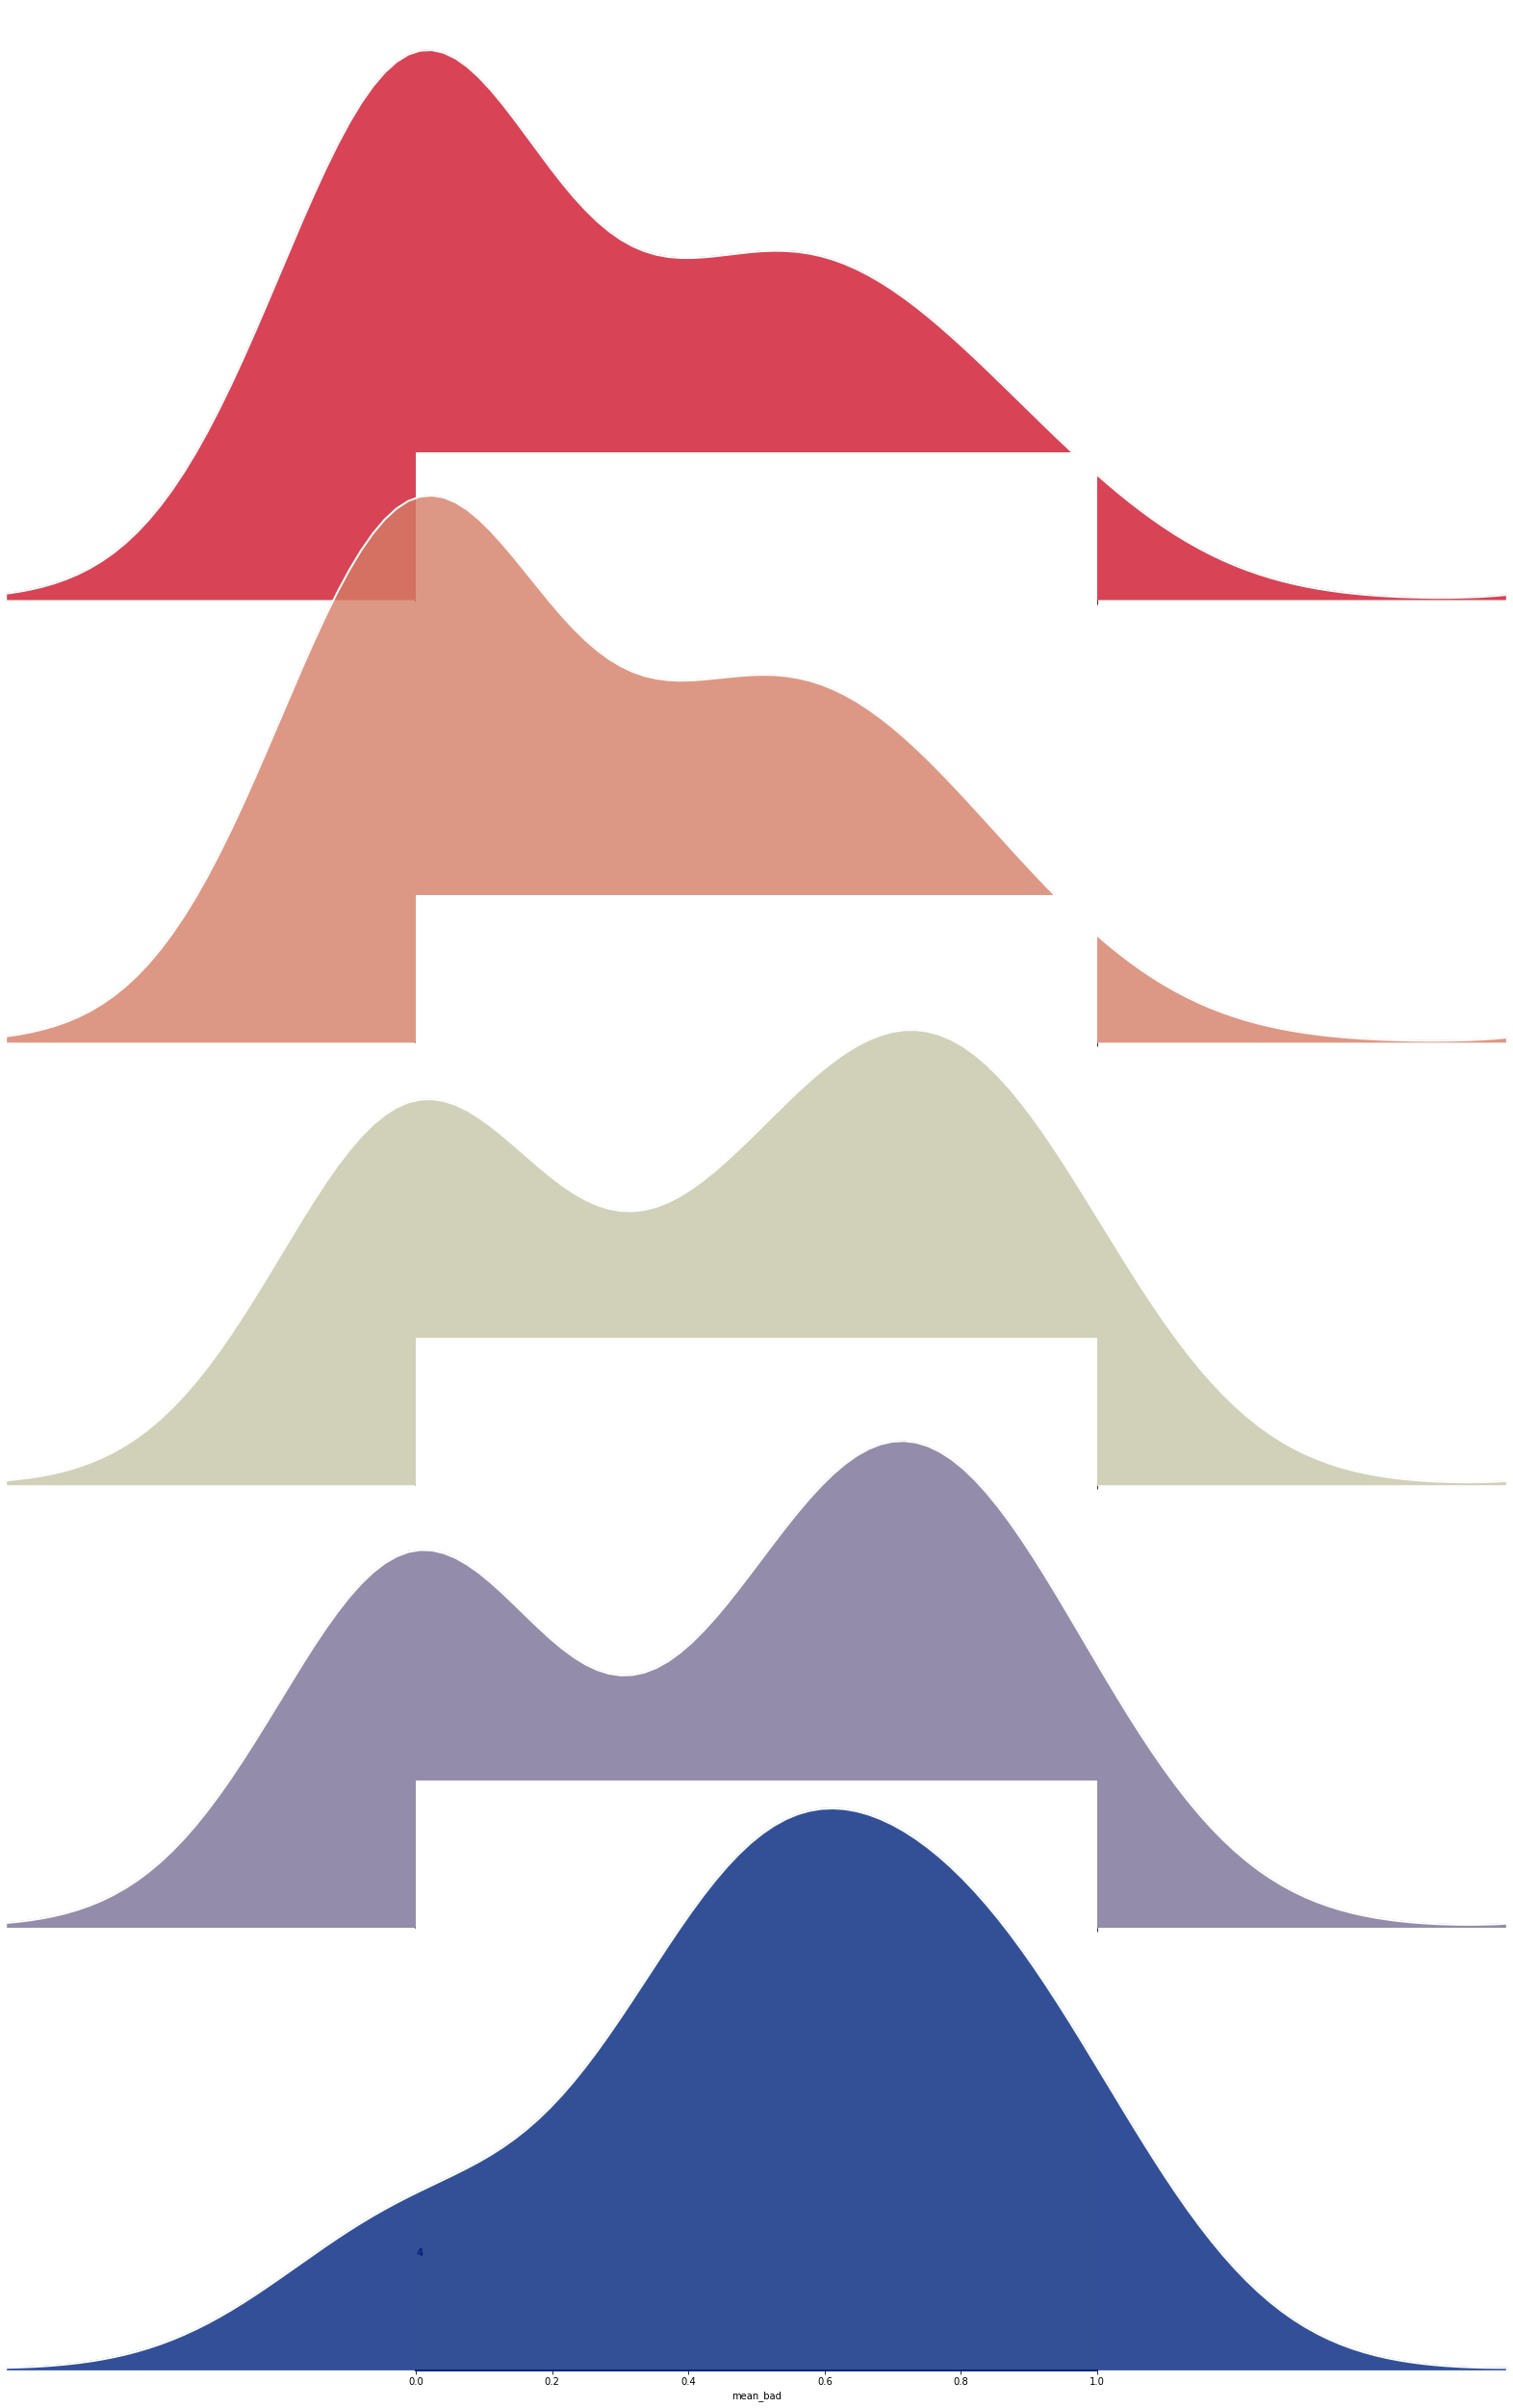

In [50]:
g = sns.FacetGrid(df,row="place",hue="place", aspect=1.5, height=7, palette=cols)

g.map(sns.kdeplot, "mean_bad", clip_on=False, shade=True, alpha=0.8, lw=1.5, bw=.2)
g.map(sns.kdeplot, "mean_bad", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "mean_bad")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
g.set(xlim=(0,1))


In [33]:
np.random.normal(0,0.01,100)

array([ 0.00455978, -0.01486774, -0.00250798,  0.00521754,  0.01293626,
       -0.02327274, -0.00858925, -0.01839747,  0.00933309, -0.00892167,
       -0.01168807, -0.00096528, -0.00494922,  0.00145341, -0.01310049,
        0.0265345 ,  0.00287401, -0.00183267, -0.00227005, -0.00712202,
       -0.00328797, -0.02454752, -0.00401807, -0.01536746,  0.01855089,
       -0.00138589,  0.00501218, -0.00742413,  0.01020675,  0.01054108,
       -0.00446733, -0.00810104, -0.00238968, -0.00917033, -0.00192303,
       -0.00470165, -0.00193485,  0.00578092, -0.00129777,  0.0089656 ,
       -0.01126904,  0.01655658, -0.00835017,  0.00192459, -0.00414209,
       -0.0026019 , -0.00253855,  0.00695749,  0.00052413, -0.00848276,
        0.00956812,  0.01284143, -0.00072849, -0.00287281, -0.01756526,
       -0.00065435,  0.01881927, -0.01566704, -0.01634369,  0.00095728,
        0.00961492,  0.00919859,  0.00748993,  0.0110774 , -0.00141223,
       -0.00419451,  0.00433933,  0.01577424,  0.00558156, -0.00

In [36]:
df['mean_bad'] + np.random.normal(0,0.01,len(df))

60    -0.009278
61     0.008861
62    -0.013129
63     0.004480
64    -0.021141
         ...   
991    0.888779
992    0.847391
993    0.802650
994    0.778527
995    0.730350
Name: mean_bad, Length: 936, dtype: float64

In [42]:
np.random.normal(0,0.01,1)[0]

0.014114125732978162